# Perturbation Solver

Aim of this script is to solve the Regge Wheeler equation for axial perturbations of the Schwarzschild metric:

\begin{align}
\left(\frac{d^2}{dr^2_*} + \sigma^2 \right) Z^{\left(\pm \right)} = V^{\left(\pm \right)} Z^{\left(\pm \right)}
\end{align}

where $V^{\left(-\right)} = \frac{\Delta}{r^5} \left[\left(\mu^2 + 2\right)r -6M\right]$, $\sigma$ is the frequency of the time dependence of the perturbation $\sim e^{\text{i} \sigma t}$, $r_*$ is the tortoise coordinate $r_* = r + 2M \ln{\left(\frac{r}{2M} - 1\right)}$ such that $\frac{d}{dr_*} = \frac{\Delta}{r^2} \frac{d}{dr}$ with $\Delta = r^2 - 2Mr$. $\mu^2$ here is $(l-1)(l+2)$ where $l + 2$ is the order of the gegenbauer polynomial used to solve the angular equation derived from the $R_{12} = R_{13}$ components of the Ricci tensor. $l \ge 2$ specifies the eigenmode for the coordinate $\theta$ (according to Wikipedia).

Notes:
- Need to pick boundary condition of $Z^{(-)}$.
- Need to pick values of $\sigma$ and $\mu$ too. Consider what needs to go into that.
- Try go from $Z^{\left(-\right)}$ all the way back to derivatives of $q_2$ and $q_3$ and even back to perturbed metric components?

Convert differential equation into one solely in terms of $r$ to get:

\begin{align}
\left(\frac{\Delta}{r^2}\right)^2 \frac{d^2Z^{\left(-\right)}}{dr^2} + \frac{2M \Delta}{r^4} \frac{dZ^{(-)}}{dr} + \left(\sigma^2 - V^{(-)}\right)Z^{(-)} = 0
\end{align}

In [17]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def system(r, y, M, sigma, l: int, perturbation):
    """Parameters- M: Mass of BH, sigma: 2pi(frequency), l: Eigenmode, perturbation: Type of perturbation"""
    
    #Coefficients and constants
    mu_sq = (l-1)*(l+2)
    Delta = -2*M*r + r**2
    if perturbation == 'Axial':
        V = (Delta/r**5)*((mu_sq + 2)*r - 6*M)
    elif perturbation == 'Polar':
        n = 1/2*mu_sq
        V = (2*Delta/(r**5*(n*r + 3*M)**2)*(n**2*(n+1)*r**3 + 3*M*n**2*r**2 + 9*M**2*n*r + 9*M**3))
    else:
        raise ValueError("Perturbation type needs to be either Axial or Polar")

    Z, dZ = y
    W = dZ
    dW = -(2*M/Delta)*W + ((r**2/Delta)**2)*(V - sigma**2)*Z

    return [W, dW]

mass = 1
eps = 1e-4 
nu = 0.5
r_interval = [2*mass+eps, 10*mass]
r_vals = np.linspace(r_interval[0], r_interval[1], 4000)

axial_sol = solve_ivp(system, r_interval, [1, 0], 'RK45', t_eval = r_vals, args = [mass, 2*np.pi*nu, 2, 'Axial'], rtol = 1e-12, atol = 1e-15)
polar_sol = solve_ivp(system, r_interval, [1, 0], 'RK45', t_eval = r_vals, args = [mass, 2*np.pi*nu, 2, "Polar"], rtol = 1e-12, atol = 1e-15)

In [18]:
r_axial = axial_sol.t
r_polar = polar_sol.t
Z_axial = axial_sol.y[0] 
Z_polar = polar_sol.y[0] 
dZ_axial = axial_sol.y[1]
dZ_polar = axial_sol.y[1]

print(len(r_axial), len(r_polar))

4000 4000


In [19]:
def potential(r, M, l, perturbation):
    """Parameters- r: Schwarzschild radial coordinates, M: Mass of BH, l: Eigenmode, perturbation: Axial or Polar"""
    mu_sq = (l-1)*(l+2)
    Delta = -2*M*r + r**2
    if perturbation == 'Axial':
        V = (Delta/r**5)*((mu_sq + 2)*r - 6*M)
    elif perturbation == 'Polar':
        n = 1/2*mu_sq
        V = (2*Delta/(r**5*(n*r + 3*M)**2)*(n**2*(n+1)*r**3 + 3*M*n**2*r**2 + 9*M**2*n*r + 9*M**3))
    else:
        raise ValueError("Perturbation type needs to be either Axial or Polar")
    return V

axial_V = potential(r_axial, mass, 2, "Axial")
polar_V = potential(r_polar, mass, 2, "Polar")

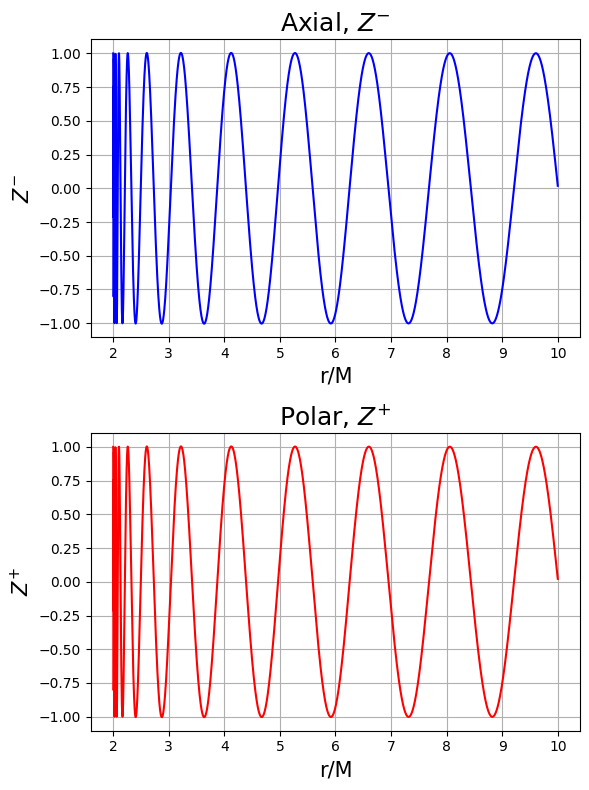

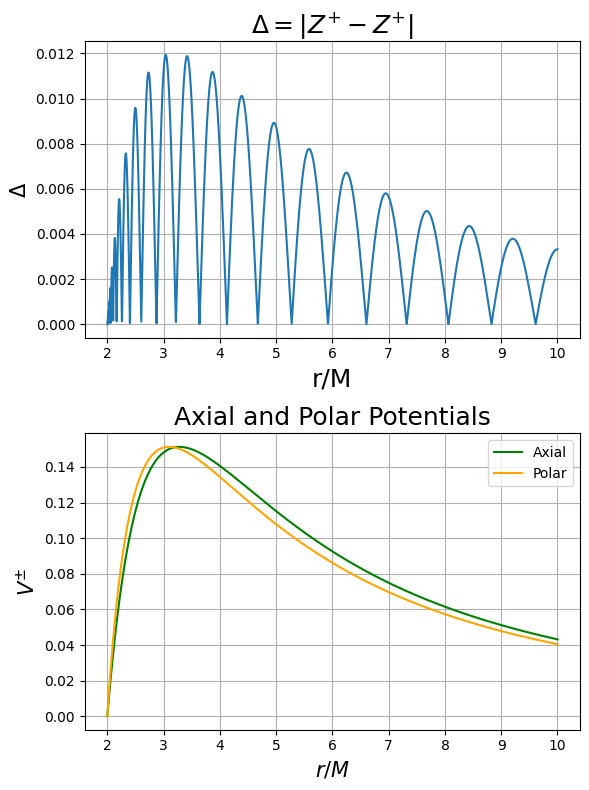

In [45]:
plt.figure(figsize = [6,8])
plt.subplot(2, 1, 1)
plt.plot(r_axial/mass, Z_axial, color = 'blue')
plt.xlabel('r/M', fontsize = 15)
plt.ylabel(r'$Z^{-}$', fontsize = 15)
plt.title(r'Axial, $Z^{-}$', fontsize = 18)
plt.tight_layout()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(r_polar/mass, Z_polar, color = 'red')
plt.xlabel('r/M', fontsize = 15)
plt.ylabel(r'$Z^{+}$', fontsize = 15)
plt.title(r'Polar, $Z^{+}$', fontsize = 18)
plt.tight_layout()
plt.grid()

plt.figure(figsize = [6,8])
plt.subplot(2, 1, 1)
plt.plot(r_axial/mass, np.abs(Z_axial - Z_polar))
plt.xlabel('r/M', fontsize = 18)
plt.ylabel(r'$\Delta$', fontsize = 15)
plt.title(r'$\Delta = |Z^{+} - Z^{+}|$', fontsize = 18)
plt.tight_layout()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(r_axial/mass, axial_V, color = 'green', label = 'Axial')
plt.plot(r_polar/mass, polar_V, color = 'orange', label = 'Polar')
plt.xlabel(r'$r/M$', fontsize = 15)
plt.ylabel(r'$V^{\pm}$', fontsize = 15)
plt.title(r'Axial and Polar Potentials', fontsize = 18)#
plt.tight_layout()
plt.legend()
plt.grid()

plt.show()